# EV Smart Scheduling

In [118]:
import os
os.chdir(path=os.path.dirname(os.path.dirname(os.path.abspath(os.curdir))))

In [119]:
from datetime import datetime, timedelta
import pandas as pd
from pytz import UTC
from watttime_optimizer import WattTimeOptimizer
import os

username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")
wt_opt = WattTimeOptimizer(username, password)

# 12 hour charge window (720/60 = 12)
now = datetime.now(UTC)
window_start = now
window_end = now + timedelta(minutes=720)

usage_plan = wt_opt.get_optimal_usage_plan(
    region="CAISO_NORTH",
    usage_window_start=window_start,
    usage_window_end=window_end,
    usage_time_required_minutes=240,
    usage_power_kw=12,
    optimization_method="auto",
)

== Simple fit! ==


In [120]:
def plot_predicated_moer(df):
    df.pred_moer.plot()

In [121]:
def plot_charging_kw(df):
    df.usage.plot(kind="bar")

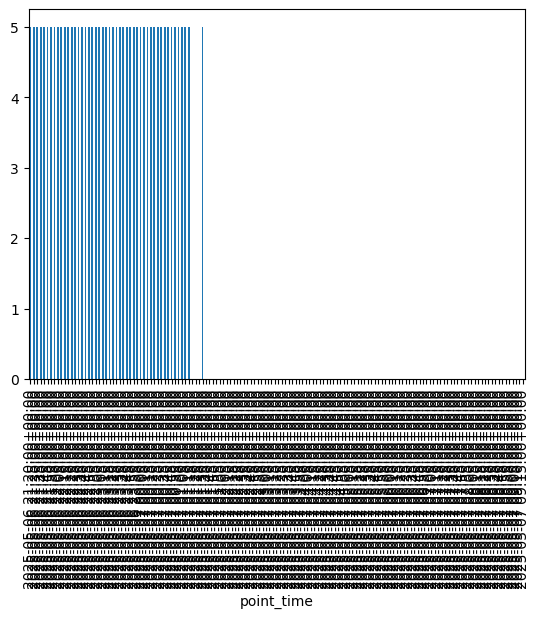

In [27]:
plot_charging_kw(usage_plan)

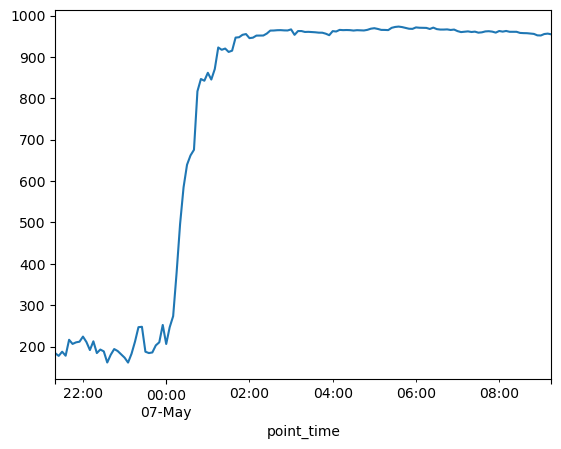

In [14]:
plot_predicated_moer(usage_plan)

/var/folders/kf/cqbq1hkx74v5lt73jq2w60x40000gn/T/ipykernel_51362/1120087637.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ticks)


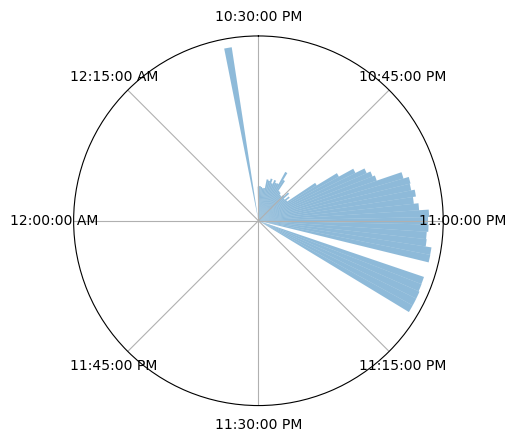

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

# Compute pie slices
N = len(usage_plan.index.values)
theta, width = np.linspace(0.0, 2 * np.pi, N, endpoint=False, retstep=True)
radii_1 = usage_plan.emissions_co2_lb.values

l = int(240/5)
radii_2 = (usage_plan.pred_moer*0.001)[:l]

offset = np.pi / 8
theta2 = theta + offset

ax = plt.subplot(projection='polar')
ax.bar(theta, radii_1, width=width, bottom=0, alpha=0.5)
#ax.bar(theta2, radii_2, width=0.4, alpha=0.5)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(True)
ax.spines['polar'].set_visible(True)
ax.set_rticks([])

ticks = usage_plan.index.strftime('%r').values[3-1::3]
ax.set_xticklabels(ticks)

plt.show()